In [2]:
# OPERATIONAL PACKAGES ---------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import inf
import scipy as sp
from scipy.optimize import curve_fit

# STYLE RESOURCES ---------------------------------------
plt.style.reload_library()
plt.style.use(['science', 'grid'])

# FITTING PACKAGES ---------------------------------------
from lmfit import Model, Parameters
import scipy.optimize as optimization
from IPython.display import display, Markdown

In [23]:
# DEFINING A FUNCTION THAT RETURNS THE UNCERTAINTY USING VARIATIONAL METHOD ---------------------------------------
def uncertainty_var(values, deltas, function):
    values, deltas = np.array(values), np.array(deltas)
    delta_matrix = deltas*np.identity(values.shape[0])
    sum = 0
    for delta in delta_matrix:
        sum += (0.5*(abs(function(values + delta) - function(values)) + abs(function(values-delta) - function(values))))**2
    return np.sqrt(sum)

# FUNCTION FOR PLOTTING A SCATTER PLOT ---------------------------------------
def ScatterPlot(xdata,ydata,error_x,error_y,color,x_label,y_label):
    
    # SCATTER PLOT
    fig = plt.figure(figsize=(5, 5), dpi=80)
    plt.errorbar(xdata,ydata,yerr=error_y,capsize = 5,marker = 'o',markersize=4, linestyle = 'None',color='black')
    plt.errorbar(xdata,ydata,xerr=error_x,capsize = 5,marker = 'o',markersize=4, linestyle = 'None',color='black')
    
    plt.xlabel(r'$\textit{'+ x_label +'}$', fontsize = 16)
    plt.ylabel(r'$\textit{'+ y_label +'}$', fontsize = 16)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig("Figures/figure1.png")
    
# DEFINING A LINEAR FUNCTION
linear = lambda x, a, b : a*x + b
cosine_square = lambda theta, a, b : a*(np.cos(theta+b))**2
div = lambda params : params[0]/params[1]
calculate_B = lambda params : mu_0*n*params[0]
    
def FUNCTION_FIT_linear(xdata, ydata, error_x, error_y, color, x_label, y_label, function):
    
    # Plotting scatter plot first
    ScatterPlot(xdata,ydata,error_x,error_y,color,x_label,y_label)
    
    # Finding best fit value
    optimal = optimization.curve_fit(function, xdata, ydata, np.array([0.0, 0.0]), error_y)
    a, b = optimal[0][0], optimal[0][1]
    pars, cov = curve_fit(f=linear, xdata=xdata, ydata=ydata, p0=[a, b], bounds=(-np.inf, np.inf))
    stdevs = np.sqrt(np.diag(cov))
    chi_squared = np.sum((function(xdata, *pars) - ydata)**2/error_y**2)
    red_chi_squared = chi_squared/(np.size(ydata)-np.size(pars))
    p_value = 1.000-sp.stats.chi2.cdf(chi_squared,(np.size(ydata)-np.size(pars)))
    variables = ['a', 'b']
    display(Markdown('## Fit Statistics'))
    df2 = pd.DataFrame()
    df2["Dof"] = [np.size(ydata)-np.size(pars)]
    df2["p-value"] = [p_value]
    df2["$\chi^2$"] = [chi_squared]
    df2["$\overline{\chi}^2$"] = [red_chi_squared]
    display(df2)
    
    display(Markdown('## Variables'))
    df = pd.DataFrame()
    df["Name"] = variables
    df["Value"] = pars
    df["Std"] = stdevs
    display(df)
    
    # Fitting data using LMFIT
    #gModel = Model(function)
    #gModel.set_param_hint('a', value=a, min=0, max=inf)
    #gModel.set_param_hint('b', value=b, min=0, max=inf)
    #params = gModel.make_params()
    #result = gModel.fit(ydata, x=xdata, a=a, b=b, weights=1/error_y)
    
    # Plotting Fitted Function
    a, b = pars[0], pars[1]
    da, db = stdevs[0], stdevs[1]
    label = r'$\textit{Y = ' + str("{:.5}".format(a)) + 'X + ' + str("{:.2}".format(b)) + '}$'
    #plt.plot(xdata,result.best_fit, color=color)
    x = np.arange(xdata.min(), xdata.max(), (xdata.max()-xdata.min())/1000) 
    #plt.loglog(x, function(x, a ,b), color=color, label=label)
    plt.plot(x, function(x, a ,b), color=color, label=label)
    
    #VERTICAL LINE 
    plt.legend(prop={'size': 12}, loc=2)
    plt.savefig("Figures/figure.png")
    plt.show()
    
    # CALCULATING THE P-VALUE
    #print('Corresponding p-value:',1.000-sp.stats.chi2.cdf(result.chisqr,result.nfree))
    #print('Degrees of freedom:',result.nfree)

    return df

def FUNCTION_FIT_angular(xdata, ydata, error_x, error_y, color, x_label, y_label, function):
    
    # Plotting scatter plot first
    ScatterPlot(xdata,ydata,error_x,error_y,color,x_label,y_label)
    
    # Finding best fit value
    optimal = optimization.curve_fit(function, xdata, ydata, np.array([250.0, 0.0]), error_y)
    a, b = optimal[0][0], optimal[0][1]
    pars, cov = curve_fit(f=function, xdata=xdata, ydata=ydata, p0=[a, b], bounds=(-np.inf, np.inf))
    stdevs = np.sqrt(np.diag(cov))
    chi_squared = np.sum((function(xdata, *pars) - ydata)**2/error_y**2)
    red_chi_squared = chi_squared/(np.size(ydata)-np.size(pars))
    p_value = 1.000-sp.stats.chi2.cdf(chi_squared,(np.size(ydata)-np.size(pars)))
    variables = ['a', 'b']
    display(Markdown('## Fit Statistics'))
    df2 = pd.DataFrame()
    df2["Dof"] = [np.size(ydata)-np.size(pars)]
    df2["p-value"] = [p_value]
    df2["$\chi^2$"] = [chi_squared]
    df2["$\overline{\chi}^2$"] = [red_chi_squared]
    display(df2)
    
    display(Markdown('## Variables'))
    df = pd.DataFrame()
    df["Name"] = variables
    df["Value"] = pars
    df["Std"] = stdevs
    display(df)
    
    # Plotting Fitted Function
    a, b = pars[0], pars[1]
    da, db = stdevs[0], stdevs[1]
    label = r'$\textit{I}$ = ' + str("{:.3}".format(a)) + r'cos^2(\theta + ' + str("{:.3}".format(b)) + ')'
    x = np.arange(xdata.min(), xdata.max(), (xdata.max()-xdata.min())/1000) 
    plt.plot(x, function(x, a, b), color=color, label=r'$I = ' + str("{:.3}".format(a)) + 'cos^2(\\theta + ' + str("{:.3}".format(b)) + ')$')
    plt.ylim([-0.1,290])
    
    #VERTICAL LINE 
    plt.legend(prop={'size': 12}, loc=2)
    plt.savefig("Figures/figure.png")
    plt.show()

    return df

# DEFINING A FUNCTION THAT RETURNS THE WEIGHTED AVERAGE WITH UNCERTAINTY
def weighted_avgs(values, deltas):
    weights = np.array(list(map(lambda x : 1/x**2, deltas)))
    best_val = np.dot(np.array(values), weights)/weights.sum()
    uncert = 1/np.sqrt(weights.sum())
    return [best_val, uncert]

In [3]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '1ArdS5-85nVQrc0nXAWkhlrrFFfuVR3TgFWdC-nMVErU'
workSheetName = 'Mag_Field_v._Current'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(googleSheetId, workSheetName)
df1, df2 = pd.read_csv(URL), pd.read_csv(URL)
df1, df2 = df1.iloc[:15 , 0:7], df2.iloc[15:29 , 0:7]
df2

,Solenoid Resistance Measured,Current (Amp),B Field (Gauss) Max,B Field (Gauss) Min,B Average,B Fixed,Uncertainty
15,NaN,0.2,20.2,19.8,20.00,19.900,0.20
16,NaN,0.4,41.0,40.5,40.75,40.625,0.25
17,NaN,0.6,60.0,59.5,59.75,59.625,0.25
18,NaN,0.8,79.7,79.3,79.50,79.400,0.20
19,NaN,1.0,99.4,98.8,99.10,98.950,0.30
20,NaN,1.2,119.5,119.0,119.25,119.125,0.25
21,NaN,1.4,140.2,139.7,139.95,139.825,0.25
22,NaN,1.6,161.0,160.4,160.70,160.550,0.30
23,NaN,1.8,181.4,180.9,181.15,181.025,0.25
24,NaN,2.0,201.6,201.3,201.45,201.375,0.15


## Fit Statistics

,Dof,p-value,$\chi^2$,$\overline{\chi}^2$
0,13,0.000969,34.618127,2.662933


## Variables

,Name,Value,Std
0,a,78.579464,0.098522
1,b,56.347143,0.179155


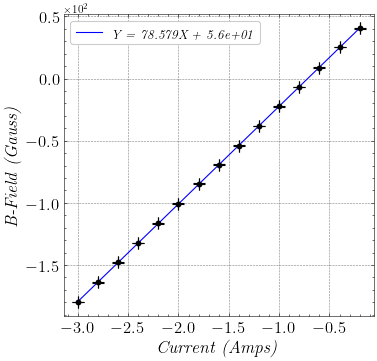

In [4]:
# PLOTTING OUR DATA FOR POSITIVE CURRENTS---------------------------------------
xdata, ydata, error_x, error_y = df1['Current (Amp)'], df1['B Average'], 0, df1['Uncertainty']
result = FUNCTION_FIT_linear(xdata, ydata, error_x, error_y, 'blue', 'Current (Amps)', 'B-Field (Gauss)', linear)

In [5]:
a1, da1 = result['Value'][0], result['Std'][0]
b1, db1 = result['Value'][1], result['Std'][1]

## Fit Statistics

,Dof,p-value,$\chi^2$,$\overline{\chi}^2$
0,12,0.0,333.633891,27.802824


## Variables

,Name,Value,Std
0,a,100.717582,0.312282
1,b,-0.576373,0.531797


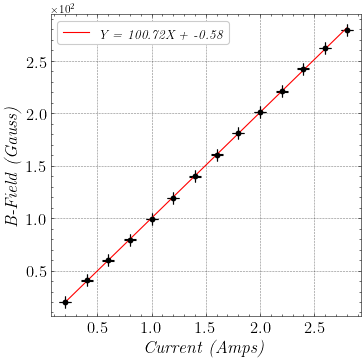

In [6]:
# PLOTTING OUR DATA FOR POSITIVE CURRENTS---------------------------------------
xdata, ydata, error_x, error_y = df2['Current (Amp)'], df2['B Average'], 0, df2['Uncertainty']
result = FUNCTION_FIT_linear(xdata, ydata, error_x, error_y, 'red', 'Current (Amps)', 'B-Field (Gauss)', linear)

In [7]:
a2, da2 = result['Value'][0], result['Std'][0]
b2, db2 = result['Value'][1], result['Std'][1]

In [8]:
weighted_avgs([a1, a2], [da1, da2])

[80.58349815875009, 0.09395686570965286]

In [9]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '1ArdS5-85nVQrc0nXAWkhlrrFFfuVR3TgFWdC-nMVErU'
workSheetName = 'MagField_v._Position'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(googleSheetId, workSheetName)
df = pd.read_csv(URL)
df = df.iloc[: , :5]
df

,Position (cm),B Field (Gauss) Max,B Field (Gauss) Min,B Field Avg,Uncert (Gauss)
0,0.5,12.7,11.1,11.90,0.80
1,1.0,19.7,15.0,17.35,2.35
2,1.5,27.2,23.0,25.10,2.10
3,2.0,36.4,33.5,34.95,1.45
4,2.5,68.3,65.3,66.80,1.50
5,3.0,81.2,79.5,80.35,0.85
6,3.5,88.5,87.5,88.00,0.50
7,4.0,96.1,95.1,95.60,0.50
8,4.5,100.2,99.7,99.95,0.25
9,5.0,102.4,101.9,102.15,0.25


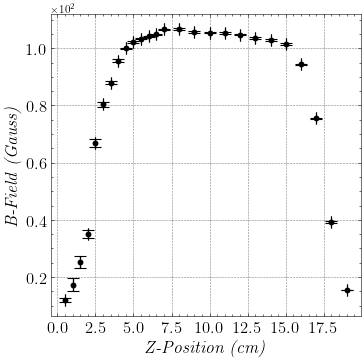

In [10]:
# PLOTTING OUR DATA FOR POSITIVE CURRENTS---------------------------------------
xdata, ydata, error_x, error_y = df['Position (cm)'], df['B Field Avg'], 0, df['Uncert (Gauss)']
ScatterPlot(xdata,ydata,error_x,error_y,'blue','Z-Position (cm)', 'B-Field (Gauss)')

In [25]:
# GENERATING HEATMAP ---------------------------------------
from matplotlib.pyplot import figure
#import seaborn as sns; sns.set()
zdata = 0
array = np.zeros([5,26])
array[2,:] = ydata
figure(figsize=(8, 4), dpi=80)
ax = sns.heatmap(array, linewidth=0.5, cmap='PuBuGn', cbar_kws={'label': 'Magnetic Field (G)'})
sns.set(font="Verdana")
plt.title(r"$\textbf{B-Field Heatmap}$", fontsize = 18)
plt.xlabel(r'$\textit{Z-Direction}$', fontsize = 16)
plt.xticks([0,6.25,12.5,18.75,25],(0,5,10,15,20), rotation=0, fontsize=16)
plt.yticks(rotation=0, fontsize=16)
plt.savefig("Figures/heatmap.png")
plt.show()

ValueError: could not broadcast input array from shape (25,) into shape (26,)

---
### MALUS' LAW
---

In [4]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '1ArdS5-85nVQrc0nXAWkhlrrFFfuVR3TgFWdC-nMVErU'
workSheetName = 'Malus_Law'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(googleSheetId, workSheetName)
df = pd.read_csv(URL)
df = df.iloc[: , :4]
df['angle_rad'] = df['Degree']*(np.pi)/180
df['Uncert_norm'] = df.apply(lambda x: uncertainty_var([x['Voltage mV'], x['Voltage mV'].max()], [x['Uncert'], x['Uncert']], div), axis=1)
df

,Degree,Voltage mV,V Normalized,Uncert,angle_rad,Uncert_norm
0,0,110.400,0.433894,0.1,0.000000,0.001281
1,15,46.600,0.183147,0.1,0.261799,0.003035
2,30,7.689,0.030219,0.1,0.523599,0.018394
3,45,2.671,0.010498,0.1,0.785398,0.052984
4,60,32.010,0.125806,0.1,1.047198,0.004418
5,75,87.230,0.342831,0.1,1.308997,0.001621
6,90,151.200,0.594246,0.1,1.570796,0.000935
7,105,207.300,0.814730,0.1,1.832596,0.000682
8,120,238.650,0.937942,0.1,2.094395,0.000593
9,135,242.110,0.951541,0.1,2.356194,0.000584


## Fit Statistics

,Dof,p-value,$\chi^2$,$\overline{\chi}^2$
0,23,0.0,35189.247853,1529.967298


## Variables

,Name,Value,Std
0,a,253.244130,1.292648
1,b,0.874846,0.004292


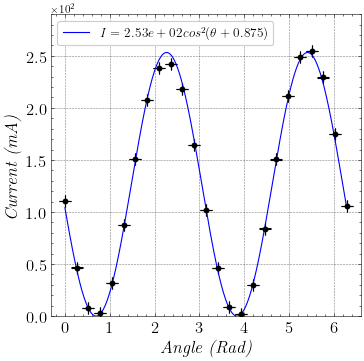

In [25]:
# PLOTTING OUR DATA FOR POSITIVE CURRENTS---------------------------------------
xdata, ydata, error_x, error_y = df['angle_rad'], df['Voltage mV'], 0, df['Uncert']
result = FUNCTION_FIT_angular(xdata, ydata, error_x, error_y, 'blue', 'Angle (Rad)', 'Current (mA)', cosine_square)

---
### DC MEASUREMENT OF POLARIZATION ROTATION 
---

In [170]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '1ArdS5-85nVQrc0nXAWkhlrrFFfuVR3TgFWdC-nMVErU'
workSheetName = 'Voltage_v._Angle'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(googleSheetId, workSheetName)
df = pd.read_csv(URL)
df = df.iloc[: , :5]
df['uncert theta'] = (1/10)

from scipy.constants import mu_0
n = 10*140/0.15
df['B'] = mu_0*n*df['Current (A)']
df['dI'] = 0.1
df['dB'] = df.apply(lambda x: uncertainty_var([x['Current (A)']], [x['dI']], calculate_B), axis=1)
df['G'], df['dG'] = df['B']*1e4, df['dB']*1e4 
df

,Current (A),Big Tick,Small Tick,Delta Theta,Min Voltage,uncert theta,B,dI,dB,G,dG
0,3.0,1,2,3.92,0.449,0.1,0.035186,0.1,0.001173,351.858377,11.728613
1,2.5,1,20,3.20,0.440,0.1,0.029322,0.1,0.001173,293.215314,11.728613
2,2.0,2,5,2.80,0.478,0.1,0.023457,0.1,0.001173,234.572252,11.728613
3,1.5,3,2,1.92,0.449,0.1,0.017593,0.1,0.001173,175.929189,11.728613
4,1.0,3,14,1.44,0.389,0.1,0.011729,0.1,0.001173,117.286126,11.728613
5,0.5,4,15,0.40,0.406,0.1,0.005864,0.1,0.001173,58.643063,11.728613
6,0.0,5,0,0.00,0.386,0.1,0.000000,0.1,0.001173,0.000000,11.728613
7,-0.5,5,20,-0.80,0.393,0.1,-0.005864,0.1,0.001173,-58.643063,11.728613
8,-1.0,6,14,-1.56,0.410,0.1,-0.011729,0.1,0.001173,-117.286126,11.728613
9,-1.5,7,1,-2.04,0.430,0.1,-0.017593,0.1,0.001173,-175.929189,11.728613


## Fit Statistics

,Dof,p-value,$\chi^2$,$\overline{\chi}^2$
0,11,1.254552e-14,90.631868,8.239261


## Variables

,Name,Value,Std
0,a,0.011577,0.000145
1,b,-0.092308,0.031844


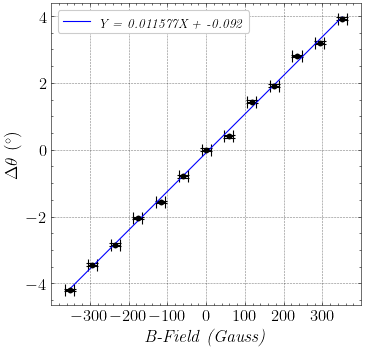

In [167]:
# PLOTTING OUR DATA FOR POSITIVE CURRENTS---------------------------------------
xdata, ydata, error_x, error_y = df['G'], df['Delta Theta'], df['dG'], df['uncert theta']
result = FUNCTION_FIT_linear(xdata, ydata, error_x, error_y, 'blue', 'B-Field (Gauss)', r'$\Delta  \theta \ (^\circ)$', linear)

In [168]:
a1, da1 = result['Value'][0], result['Std'][0]

In [169]:
a1, da1

(0.011576835610257765, 0.0001451281890795694)

In [162]:
verdet = lambda params : params[0]/10 # params = [slope]
verdet_exp, verdet_unc = verdet([a1]), uncertainty_var([a1], [da1], verdet)

In [163]:
verdet_exp, verdet_unc

(0.0011576835610257765, 1.4512818907956907e-05)

In [164]:
# DETERMING THE %ERROR
verdet_theor = 0.0013
error = abs((verdet_exp-verdet_theor)/verdet_theor)*100
print("Percentage error: ", error, "%")
exp_precision = 100*verdet_exp/verdet_unc
print('Experimental precision:', exp_precision, '%')
print('Sigmas:', error/exp_precision)

Percentage error:  10.947418382632575 %
Experimental precision: 7976.972415683187 %
Sigmas: 0.0013723776154859605
